# 基于文本的推荐系统

In [27]:
import pandas as pd
small_matrix = pd.read_csv("small_matrix.csv")
print("small_matrix is loaded.")

item_categories = pd.read_csv("item_categories.csv")
print("item_categories is loaded.")

social_network = pd.read_csv("social_network.csv")
social_network["friend_list"] = social_network["friend_list"].map(eval)
print("social_network is loaded.")

user_features = pd.read_csv("user_features.csv")
item_categories["feat"] = item_categories["feat"].map(eval)
print("user_features is loaded.")

item_daily_features = pd.read_csv("item_daily_features.csv")
print("item_daily_features is loaded.")

small_matrix is loaded.
item_categories is loaded.
social_network is loaded.
user_features is loaded.
item_daily_features is loaded.


In [52]:
small_matrix
missing_values = small_matrix.isna()
missing_values_count = missing_values.sum()
print(missing_values_count)

user_id                0
video_id               0
play_duration          0
video_duration         0
time              181992
date              181992
timestamp         181992
watch_ratio            0
dtype: int64


In [53]:
# 缺失值处理
if any(missing_values_count):
    print("存在缺失值的列：")
    print(missing_values_count[missing_values_count > 0])
else:
    print("数据集中没有缺失值")

存在缺失值的列：
time         181992
date         181992
timestamp    181992
dtype: int64


In [14]:
item_categories

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]
...,...,...
10723,10723,[11]
10724,10724,[2]
10725,10725,[15]
10726,10726,[19]


In [16]:
social_network

,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]
...,...,...
467,2331,[4345]
468,6163,[1332]
469,3732,[670]
470,3335,[202]


In [17]:
user_features

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,7171,full_active,0,0,1,52,"(50,100]",1,"[1,10)",0,...,259,1,4,0,1.0,0.0,0.0,0.0,0.0,0.0
7172,7172,full_active,0,0,0,45,"(10,50]",2,"[1,10)",2,...,11,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0
7173,7173,full_active,0,0,0,615,500+,3,"[1,10)",2,...,51,2,2,0,1.0,0.0,0.0,0.0,0.0,0.0
7174,7174,full_active,0,0,0,959,500+,0,0,0,...,107,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
item_daily_features

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343336,10723,20200905,236,NORMAL,2020-09-05,ShortImport,public,4833.0,720,1280,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
343337,10724,20200905,5271,NORMAL,2020-09-05,LongImport,public,54720.0,720,1280,...,1,1,0,0,0,0,0.0,0.0,0.0,0.0
343338,10725,20200905,1924,NORMAL,2020-09-05,ShortImport,public,15800.0,576,1024,...,5,5,0,0,4,4,0.0,0.0,0.0,0.0
343339,10726,20200905,7604,NORMAL,2020-09-05,ShortImport,public,5132.0,528,960,...,2,2,0,0,1,1,0.0,0.0,0.0,0.0


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname="./SimHei.ttf")

def visual_continue(df, func=None):
    ax = sns.distplot(df)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()

In [38]:
import warnings; warnings.simplefilter('ignore')

## 一.数据可视化

对social_network数据集进行数据可视化

count    472.000000
mean       1.419492
std        0.853295
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: friend_list, dtype: float64


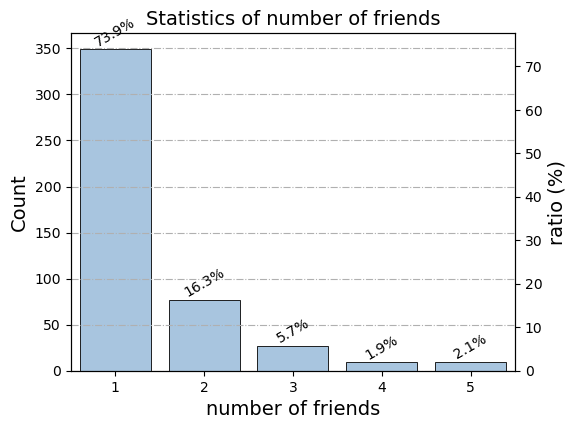

In [39]:
print(social_network.friend_list.map(len).describe())
visual_statistics_discrete(social_network.friend_list.map(len), "number of friends")

对item_categories数据集进行可视化处理

count    10728.000000
mean         1.183166
std          0.436205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: feat, dtype: float64


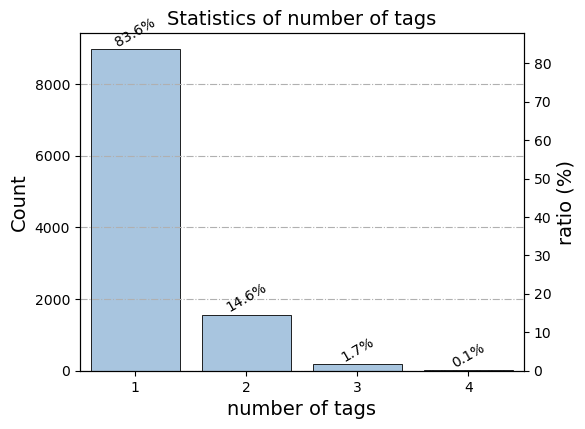

In [40]:
num_feat = item_categories.feat.map(len)
print(num_feat.describe())
visual_statistics_discrete(num_feat, "number of tags")

这里展示了item_gategories中各类feat出现的频率,可以看出11出现的次数最多,各类电影的分布较为平均.

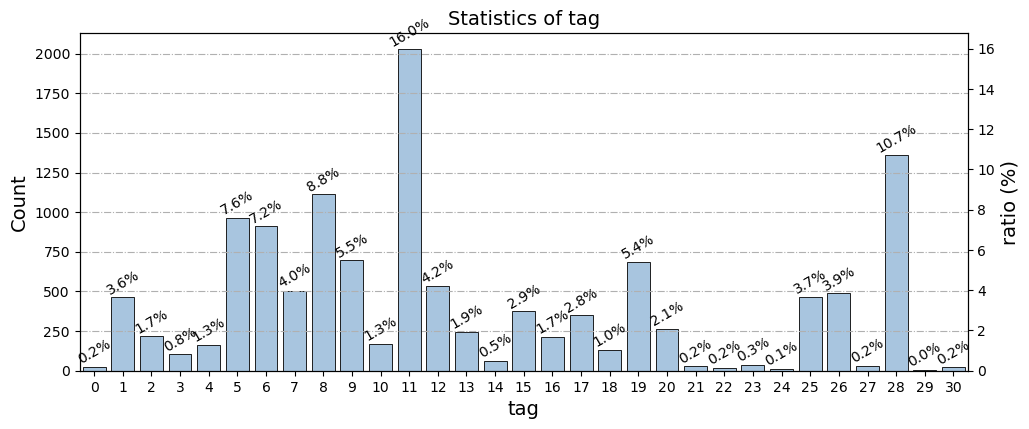

In [41]:
import collections
import itertools

cnt = item_categories.feat.map(collections.Counter)
cnt_all = collections.Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

对watch_ratio进行可视化处理,可以看出大家观看电影的完成度情况.

count    4.653780e+06
mean     8.553870e-01
std      5.952060e-01
min      0.000000e+00
25%      4.657859e-01
50%      7.662410e-01
75%      1.114060e+00
max      5.000000e+00
Name: watch_ratio, dtype: float64


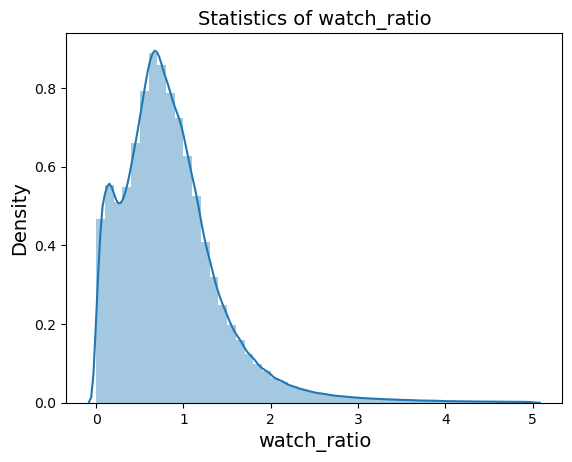

In [42]:
small_watch_ratio = small_matrix.watch_ratio[small_matrix.watch_ratio <= 5]
print(small_watch_ratio.describe())
visual_continue(small_watch_ratio)

对video_duration进行可视化处理

count    4.676570e+06
mean     1.448645e+04
std      2.046711e+04
min      3.067000e+03
25%      7.523000e+03
50%      9.600000e+03
75%      1.193400e+04
max      3.150720e+05
Name: video_duration, dtype: float64


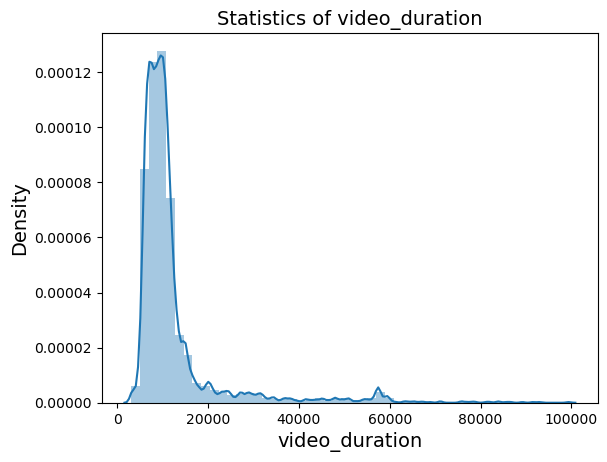

In [43]:
small_video_duration = small_matrix.video_duration
print(small_video_duration.describe())
visual_continue(small_video_duration[small_video_duration < 100000])

对play_times进行可视化处理

              date
count  1411.000000
mean   3314.365698
std       6.984852
min    3295.000000
25%    3309.000000
50%    3315.000000
75%    3320.000000
max    3327.000000


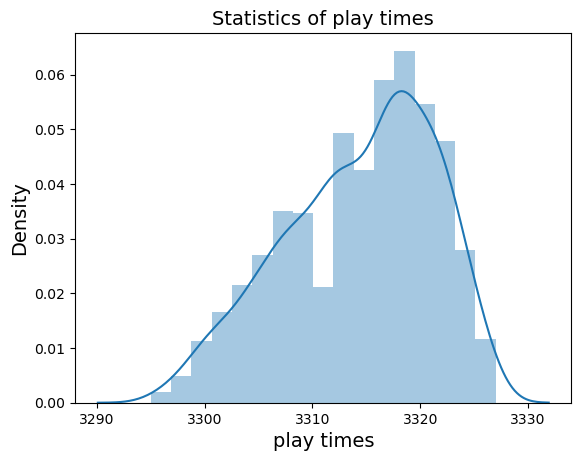

In [44]:
small_play_time = small_matrix.groupby('user_id').agg({"date":len})
small_play_time.name = "play times"
print(small_play_time.describe())
visual_continue(small_play_time)

对daily_play_times进行可视化处理

count    86671.000000
mean        51.857922
std         32.608372
min          1.000000
25%         28.000000
50%         47.000000
75%         70.000000
max        402.000000
Name: play times, dtype: float64


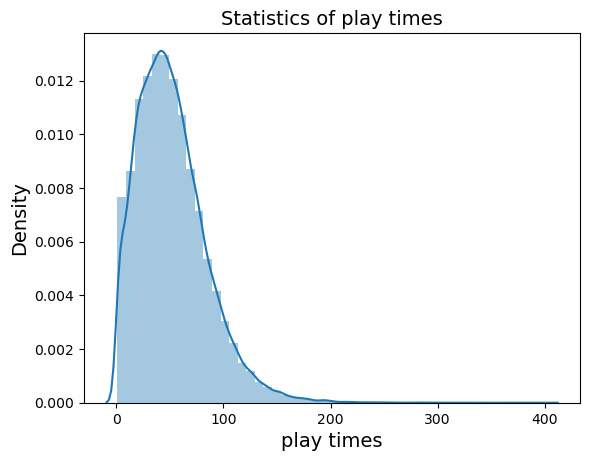

In [45]:
small_daily_play_time = small_matrix.groupby(['user_id', 'date']).size()
small_daily_play_time.name = "play times"
print(small_daily_play_time.describe())
visual_continue(small_daily_play_time)

In [63]:
# 分析最常被访问的页面、页面访问量分布等
small_matrix = pd.DataFrame(small_matrix)
movie_count = small_matrix['video_id'].value_counts().reset_index(name = 'count').rename(columns={'index': 'video_id'})
print(movie_count)

      video_id  count
0          744   1411
1         1050   1411
2         5777   1411
3        10006   1411
4         7183   1411
...        ...    ...
3322      6753   1320
3323      7083   1319
3324      5973   1318
3325       784   1315
3326      9984   1315

[3327 rows x 2 columns]


## 二.关联规则分析

根据watch_ratio大小对电影进行分组,设置阈值可以分成如下5组:

In [65]:
# 对watch_ratio列进行分组
bins = [0,1,2,3,4,5]
labels = ['no interest', 'a little interest', 'interest', 'very interest', 'love']
small_matrix['watch_ratio_group'] = pd.cut(small_matrix['watch_ratio'], bins=bins, labels=labels)
watch_ratio_group = small_matrix.groupby(pd.cut(small_matrix['watch_ratio'], bins=bins, labels=labels)).size().reset_index(name='count')


In [66]:
watch_ratio_group

,watch_ratio,count
0,no interest,3131541
1,a little interest,1297542
2,interest,145382
3,very interest,35234
4,love,13769


In [93]:
print(watch_ratio_group['count'][0])
print(watch_ratio_group['count'].sum())

3131541
4623468


In [73]:
merged_data = pd.merge(small_matrix, item_categories[['video_id', 'feat']], left_on='video_id', right_on='video_id')

In [74]:
print(merged_data)

         user_id  video_id  play_duration  video_duration  \
0             14       148           4381            6067   
1             19       148           8167            6067   
2             21       148           8811            6067   
3             23       148          11538            6067   
4             24       148          12856            6067   
...          ...       ...            ...             ...   
4676565     7141      9164           7046           17090   
4676566     7142      9164           9472           17090   
4676567     7147      9164           9359           17090   
4676568     7153      9164          12493           17090   
4676569     7159      9164           3477           17090   

                            time        date     timestamp  watch_ratio  \
0        2020-07-05 05:27:48.378  20200705.0  1.593898e+09     0.722103   
1         2020-07-23 12:08:54.16  20200723.0  1.595477e+09     1.346135   
2        2020-07-05 16:49:12.936  20200705

In [75]:
# 首先，按照 user_id 和 video_id 进行分组，并计算每个分组中的最大观看比例。
grouped = small_matrix.groupby(['user_id', 'video_id']).agg({'watch_ratio': 'max'})

# 然后，将分组结果重置索引为普通列，方便后续合并操作。
result = grouped.reset_index()

# 接下来，将 small_matrix 与 result 合并，以获取每个视频的观看比例和对应的用户 ID。
merged = pd.merge(small_matrix[['user_id', 'video_id']], result, on=['user_id', 'video_id'])

# 最后，将 item_categories 与 merged 合并，以找到感兴趣的 feat 列。
feats_df = pd.merge(merged[['video_id', 'watch_ratio']], item_categories[['video_id', 'feat']], on='video_id')


In [76]:
print(feats_df)

         video_id  watch_ratio          feat
0             148     0.722103  [11, 28, 19]
1             148     1.346135  [11, 28, 19]
2             148     1.452283  [11, 28, 19]
3             148     1.901764  [11, 28, 19]
4             148     2.119004  [11, 28, 19]
...           ...          ...           ...
4676565      9164     0.412288          [16]
4676566      9164     0.554242          [16]
4676567      9164     0.547630          [16]
4676568      9164     0.731012          [16]
4676569      9164     0.203452          [16]

[4676570 rows x 3 columns]


In [77]:
# 计算支持度和置信度
counts_id = small_matrix['video_id'].value_counts()
most_count_id = counts_id.idxmax()
print(most_count_id)

744


填充缺失值否则无法进行apriori算法

In [86]:
small_matrix.fillna(0, inplace=True)

In [103]:
small = small_matrix.drop(['time', 'date', 'timestamp'], axis=1)

In [105]:
small = small.head(10000)

In [106]:
print(small)

      user_id  video_id  play_duration  video_duration  watch_ratio  \
0        True      True           True            True         True   
1        True      True           True            True         True   
2        True      True           True            True         True   
3        True      True           True            True         True   
4        True      True           True            True         True   
...       ...       ...            ...             ...          ...   
9995     True      True           True            True         True   
9996     True      True           True            True         True   
9997     True      True           True            True         True   
9998     True      True           True            True         True   
9999     True      True           True            True         True   

     watch_ratio_group  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True

对关联规则进行分析:

使用lift对关联规则进行评价

In [110]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(small, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("频繁项集：")
print(frequent_itemsets)
print("关联规则：")
print(rules)
rules.sort_values(by=['lift'], ascending=False, inplace=True)

频繁项集：
   support                                           itemsets
0      1.0                                          (user_id)
1      1.0                                         (video_id)
2   0.9956                                    (play_duration)
3      1.0                                   (video_duration)
4   0.9956                                      (watch_ratio)
..     ...                                                ...
58  0.9917  (video_id, play_duration, user_id, watch_ratio...
59  0.9917  (video_id, user_id, watch_ratio, watch_ratio_g...
60  0.9917  (play_duration, user_id, watch_ratio, watch_ra...
61  0.9917  (video_id, play_duration, watch_ratio, watch_r...
62  0.9917  (video_id, play_duration, user_id, watch_ratio...

[63 rows x 2 columns]
关联规则：
             antecedents                                        consequents  \
0              (user_id)                                         (video_id)   
1             (video_id)                                       

C:\ProgramData\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [113]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
rules.sort_values(by=['lift'], ascending=False, inplace=True)
print("频繁项集：")
print(frequent_itemsets)
print("关联规则：")
print(rules)
rules.sort_values(by=['lift'], ascending=False, inplace=True)

频繁项集：
   support                                           itemsets
0      1.0                                          (user_id)
1      1.0                                         (video_id)
2   0.9956                                    (play_duration)
3      1.0                                   (video_duration)
4   0.9956                                      (watch_ratio)
..     ...                                                ...
58  0.9917  (video_id, play_duration, user_id, watch_ratio...
59  0.9917  (video_id, user_id, watch_ratio, watch_ratio_g...
60  0.9917  (play_duration, user_id, watch_ratio, watch_ra...
61  0.9917  (video_id, play_duration, watch_ratio, watch_r...
62  0.9917  (video_id, play_duration, user_id, watch_ratio...

[63 rows x 2 columns]
关联规则：
                                       antecedents  \
333                            (watch_ratio_group)   
148                   (user_id, watch_ratio_group)   
136       (user_id, video_duration, play_duration)   
138  

### 结果分析:
本数据集展示了人们对电影的喜爱程度,通过对这部电影观看完整度来判断(watch_ratio).
首先对数据集进行了预处理,包括数据可视化,缺失值的处理等操作,具体如上所示;
接着对数据集进行支持度和置信度的计算,分别针对每个人(user_id)所观看电影完成度(watch_ratio)来判断其对哪些电影有较强的好感度;
最后通过watch_ratio的分组在item_categories数据集中找到对应电影的种类(feat),进而完成对电影偏好的预测.

## 三.结果分析
1.支持度:越高说明项集出现的频率越高,即更普遍.这里user_id,video_id和video_duration支持度均为1,所以出现的最为频繁;
2.置信度:越高说明关联规则越强.这里confidence的值均为1,说明置信度很高,关联规则很可靠;
3.提升度:反应结论项和条件项之间的依赖关系程度,大于1正相关,小于1负相关.可以看出这里均为正相关关系.
4.卡方检验:反应结论项和条件项之间的相关性和独立性.